In [6]:
import sys
# Sorry for this code : (
sys.path.append('../')

import os
import numpy as np
from matplotlib import pyplot as plt
from settings import Params

def load_experiment(name, newest=False):
    core = 0
    batch = 0

    if newest:
        children = os.listdir("../hearts/"  )
        
        new_name = None
        suffix = -1
        for child in children:
            child_name = child.split("-")

            if len(child_name) == 1:
                if new_name is None:
                    new_name = child_name
                    suffix = 0
                continue

            

            child_suffix = int(child_name[1])
            if child_name[0] == name and child_suffix > suffix:
                new_name = child
                suffix = child_suffix
        
        if new_name is None:
            raise ValueError(f"Heart wiht name {name} does not exist")
        
        name = new_name
        

    par = Params(f"../hearts/{name}/params.json")
    t_start = par.get("t_start")
    t_end = par.get("t_end")

    states = np.load(f"../hearts/{name}/data/states_{core}_{batch}.npy")
    actions = np.load(f"../hearts/{name}/data/actions_{core}_{batch}.npy")

    return states, actions, t_start, t_end, par, name


single_cell-6


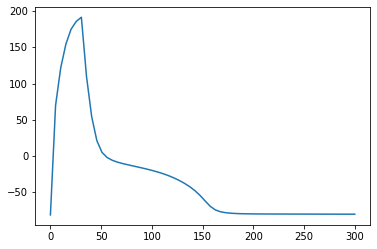

In [18]:
states, actions, t_start, t_end, par, name = load_experiment("single_cell", newest=True)

print(name)

Vs = np.squeeze(states).T[0]
t = np.linspace(t_start, t_end, num=len(Vs))

plt.plot(t, Vs)

single_cell-14


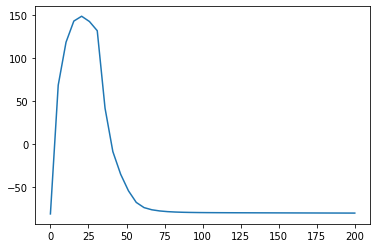

In [27]:
states, actions, t_start, t_end, par, name = load_experiment("single_cell", newest=True)

print(name)

Vs = np.squeeze(states).T[0]
t = np.linspace(t_start, t_end, num=len(Vs))

plt.plot(t, Vs)